## Tasks To Do: 
## Create a jupyter notebook.

## 1. Import the 2 datasets and join them as one file.

In [60]:
import pandas as pd
dataset1 = pd.read_csv('LR1865SZ_cycles201214_002_4.csv')
dataset2 = pd.read_csv('LR1865SZ_cycles201217_001_2.csv')

In [62]:
dataset1.head()


,Data_Point,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(_),Date_Time,Cycle_Index
0,1,0:00:00,0.0,0.0,4.1902,0.0,-,14/12/20 10:16,1
1,2,0:00:01,0.0,0.0,4.1902,0.0,-,14/12/20 10:16,1
2,3,0:00:02,0.0,0.0,4.1893,0.0,-,14/12/20 10:16,1
3,4,0:00:04,0.0,0.0,4.1905,0.0,-,14/12/20 10:16,1
4,5,0:00:05,0.0,0.0,4.1902,0.0,-,14/12/20 10:16,1


In [22]:
dataset1.shape

(202516, 9)

In [7]:
dataset2.head()

,Data_Point,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(_),Date_Time,Cycle_Index
0,1,0:00:00,0.0,0.0,4.1859,0.0,-,17/12/20 9:45,1
1,2,0:00:02,0.0,0.0,4.1859,0.0,-,17/12/20 9:46,1
2,3,0:00:03,0.0,0.0,4.1859,0.0,-,17/12/20 9:46,1
3,4,0:00:04,0.0,0.0,4.1859,0.0,-,17/12/20 9:46,1
4,5,0:00:05,0.0,0.0,4.1859,0.0,-,17/12/20 9:46,1


In [23]:
dataset2.shape

(126648, 9)

In [11]:
print("Dataset 1 Columns:", dataset1.columns)
print("Dataset 2 Columns:", dataset2.columns)


Dataset 1 Columns: Index(['Data_Point', 'Test_Time(s)', 'Current(A)', 'Capacity(Ah)',
       'Voltage(V)', 'Energy(Wh)', 'Temperature(_)', 'Date_Time',
       'Cycle_Index'],
      dtype='object')
Dataset 2 Columns: Index(['Data_Point', 'Test_Time(s)', 'Current(A)', 'Capacity(Ah)',
       'Voltage(V)', 'Energy(Wh)', 'Temperature(_)', 'Date_Time',
       'Cycle_Index'],
      dtype='object')


In [66]:
merged_dataset = pd.concat([dataset1, dataset2], ignore_index=True)
merged_preview = merged_dataset.head()
merged_shape = merged_dataset.shape
(merged_preview, merged_shape)


(   Data_Point Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  Energy(Wh)  \
 0           1      0:00:00         0.0           0.0      4.1902         0.0   
 1           2      0:00:01         0.0           0.0      4.1902         0.0   
 2           3      0:00:02         0.0           0.0      4.1893         0.0   
 3           4      0:00:04         0.0           0.0      4.1905         0.0   
 4           5      0:00:05         0.0           0.0      4.1902         0.0   
 
   Temperature(_)       Date_Time  Cycle_Index  
 0              -  14/12/20 10:16            1  
 1              -  14/12/20 10:16            1  
 2              -  14/12/20 10:16            1  
 3              -  14/12/20 10:16            1  
 4              -  14/12/20 10:16            1  ,
 (329164, 9))

In [25]:
output_file = 'merged_data.csv'
merged_dataset.to_csv(output_file, index=False)

## 2. Analyse each variable such as voltage, time, current, capacity, energy, cycle_Index

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('merged_data.csv')


Analysis of Voltage(V):

count    329164.000000
mean          3.718508
std           0.302283
min           2.999400
25%           3.488700
50%           3.760900
75%           3.983100
max           4.200800
Name: Voltage(V), dtype: float64
Missing Values: 0


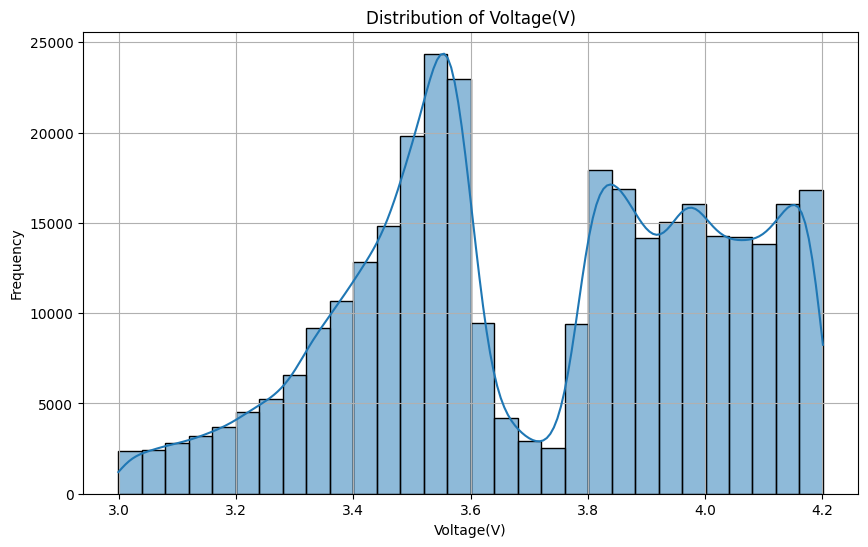


Analysis of Test_Time(s):

count         329164
unique        199752
top       1-05:59:04
freq               5
Name: Test_Time(s), dtype: object
Missing Values: 0


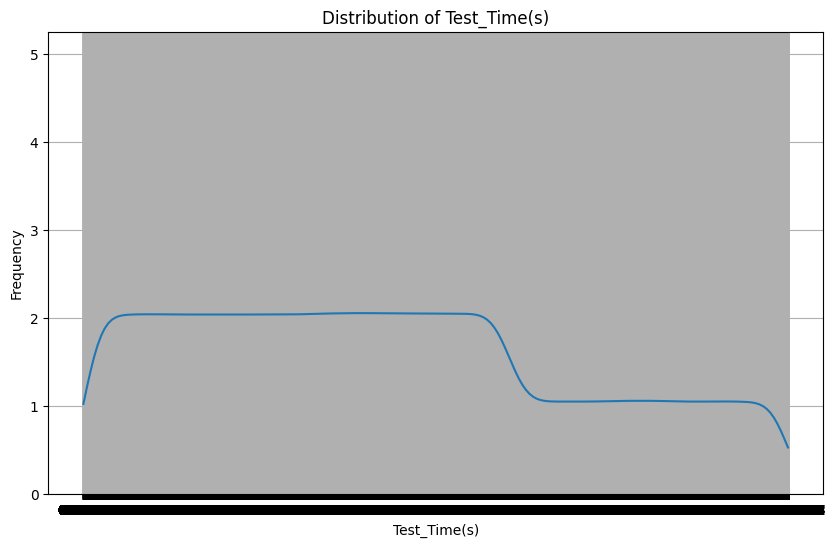


Analysis of Current(A):

count    329164.000000
mean         -0.027540
std           4.487984
min          -7.207000
25%          -4.807000
50%           0.000000
75%           4.807000
max           7.207000
Name: Current(A), dtype: float64
Missing Values: 0


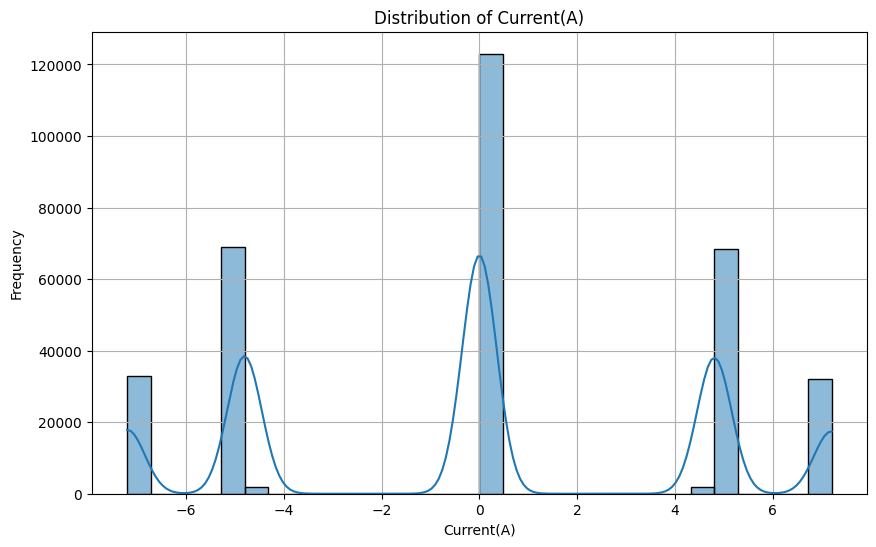


Analysis of Capacity(Ah):

count    329164.000000
mean          0.617299
std           0.417264
min           0.000000
25%           0.305000
50%           0.527000
75%           0.870000
max           2.271000
Name: Capacity(Ah), dtype: float64
Missing Values: 0


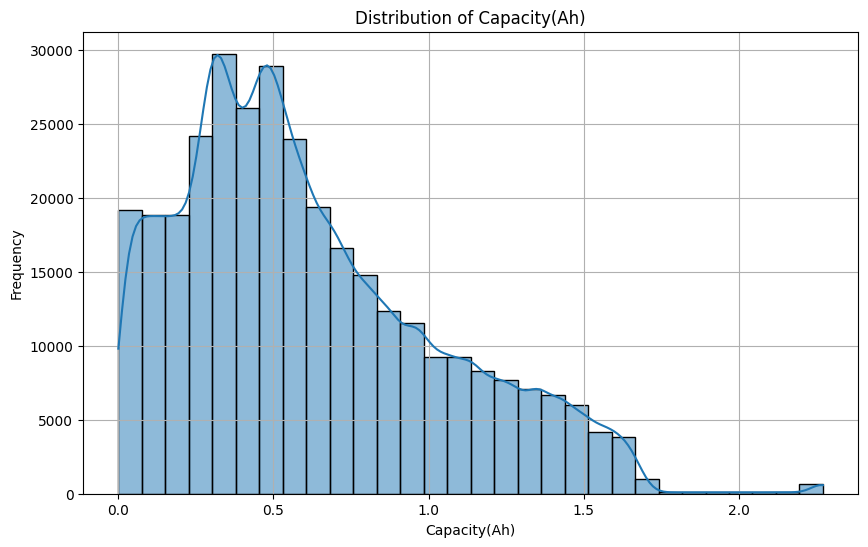


Analysis of Energy(Wh):

count    329164.000000
mean          2.311602
std           1.575760
min           0.000000
25%           1.117000
50%           1.966000
75%           3.258000
max           8.111000
Name: Energy(Wh), dtype: float64
Missing Values: 0


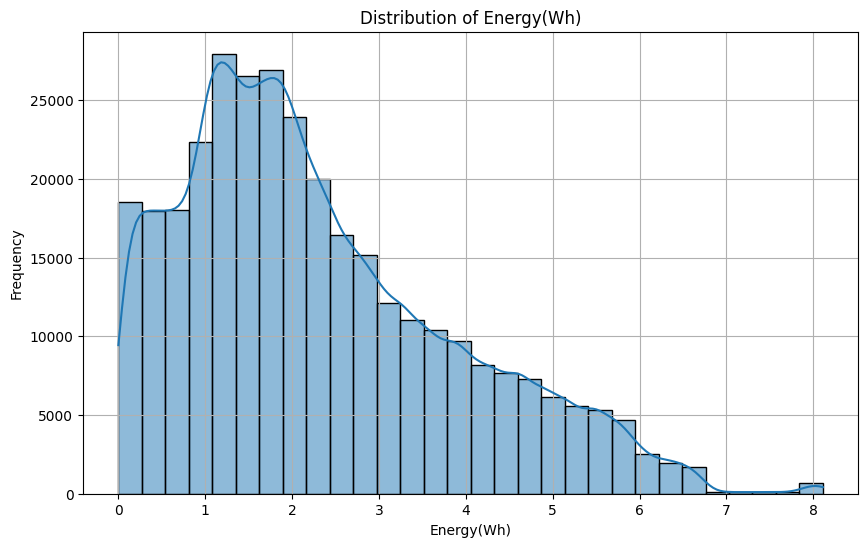


Analysis of Cycle_Index:

count    329164.000000
mean         43.453658
std          29.107710
min           1.000000
25%          18.000000
50%          39.000000
75%          67.000000
max         101.000000
Name: Cycle_Index, dtype: float64
Missing Values: 0


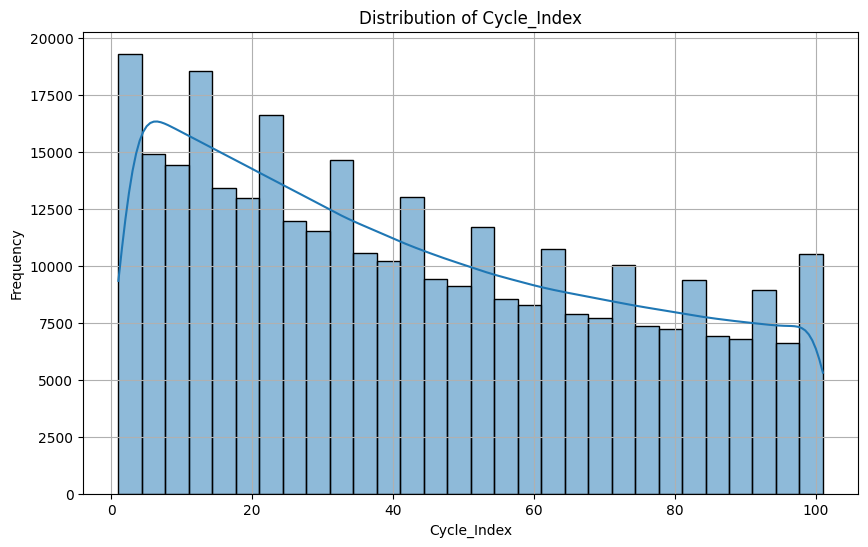

In [4]:
def analyze_variable(variable_name):
    print(f"\nAnalysis of {variable_name}:\n")
    print(data[variable_name].describe())
    print(f"Missing Values: {data[variable_name].isna().sum()}")
    
    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data[variable_name], kde=True, bins=30)
    plt.title(f"Distribution of {variable_name}")
    plt.xlabel(variable_name)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# List of variables to analyze
variables = ['Voltage(V)', 'Test_Time(s)', 'Current(A)', 
             'Capacity(Ah)', 'Energy(Wh)', 'Cycle_Index']

# Perform analysis for each variable
for var in variables:
    if var in data.columns:
        analyze_variable(var)
    else:
        print(f"Variable '{var}' not found in dataset.")

## 3. Perform the exploratory data analysis (EDA : Univariate, Bivariate etc) and clean the data.

In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv('merged_data.csv')

# Basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\
First few rows:")
print(df.head())

print("\
Basic statistics:")
print(df.describe())

print("\
Missing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329164 entries, 0 to 329163
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data_Point      329164 non-null  int64  
 1   Test_Time(s)    329164 non-null  object 
 2   Current(A)      329164 non-null  float64
 3   Capacity(Ah)    329164 non-null  float64
 4   Voltage(V)      329164 non-null  float64
 5   Energy(Wh)      329164 non-null  float64
 6   Temperature(_)  329164 non-null  object 
 7   Date_Time       329164 non-null  object 
 8   Cycle_Index     329164 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 22.6+ MB
None
First few rows:
   Data_Point Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  Energy(Wh)  \
0           1      0:00:00         0.0           0.0      4.1902         0.0   
1           2      0:00:01         0.0           0.0      4.1902         0.0   
2           3      0:00:02         0.0        

In [26]:
# Cleaning the data
# Converting Date_Time to datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d/%m/%y %H:%M', errors='coerce')

# Replace non-numeric values in Temperature(_) with NaN and convert to numeric
df['Temperature(_)'] = pd.to_numeric(df['Temperature(_)'], errors='coerce')

# Checking for any remaining missing values after cleaning
print("Missing values after cleaning:")
print(df.isnull().sum())

# Droping rows with missing Date_Time as it is critical for analysis
df = df.dropna(subset=['Date_Time'])

# Cleaned data info
print("\
Cleaned Dataset Info:")
print(df.info())

Missing values after cleaning:
Data_Point             0
Test_Time(s)           0
Current(A)             0
Capacity(Ah)           0
Voltage(V)             0
Energy(Wh)             0
Temperature(_)    329164
Date_Time              0
Cycle_Index            0
dtype: int64
Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329164 entries, 0 to 329163
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Data_Point      329164 non-null  int64         
 1   Test_Time(s)    329164 non-null  object        
 2   Current(A)      329164 non-null  float64       
 3   Capacity(Ah)    329164 non-null  float64       
 4   Voltage(V)      329164 non-null  float64       
 5   Energy(Wh)      329164 non-null  float64       
 6   Temperature(_)  0 non-null       float64       
 7   Date_Time       329164 non-null  datetime64[ns]
 8   Cycle_Index     329164 non-null  int64         
dtypes: datetime

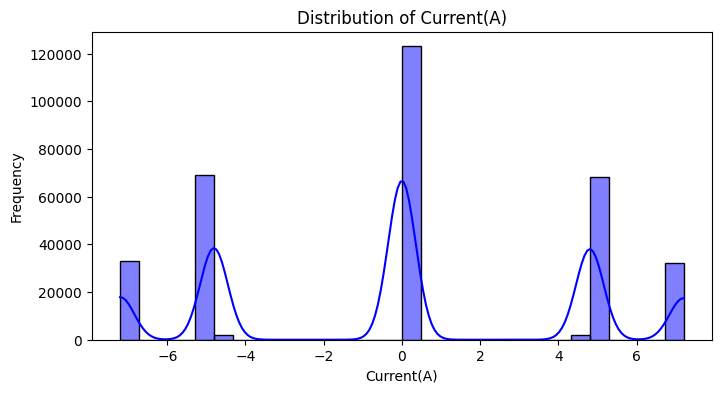

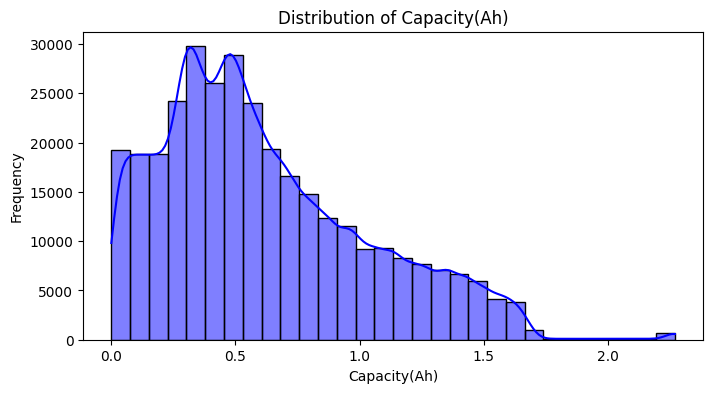

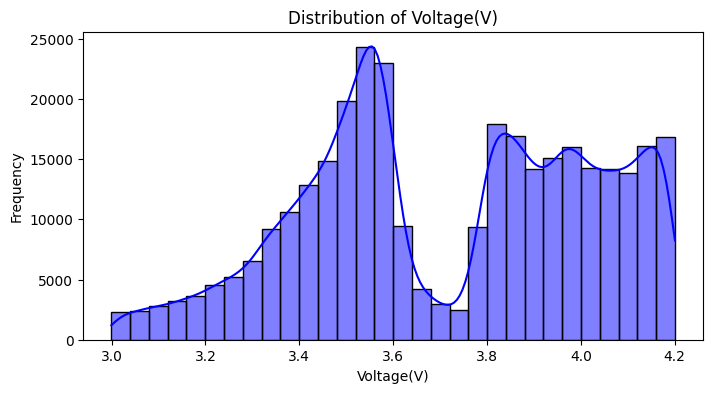

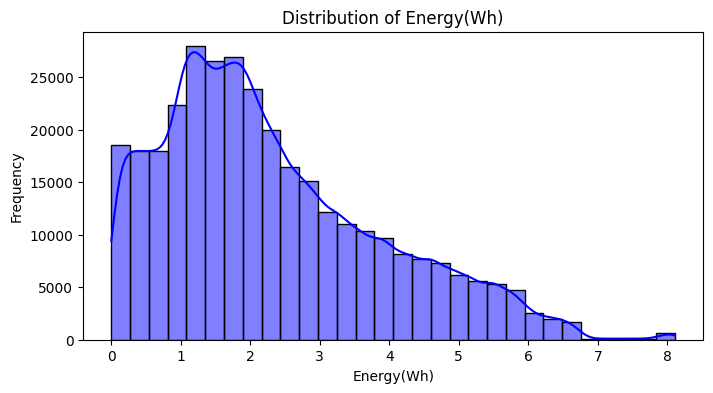

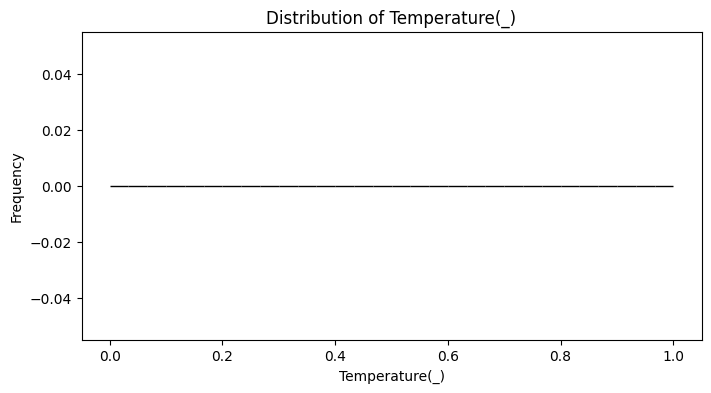

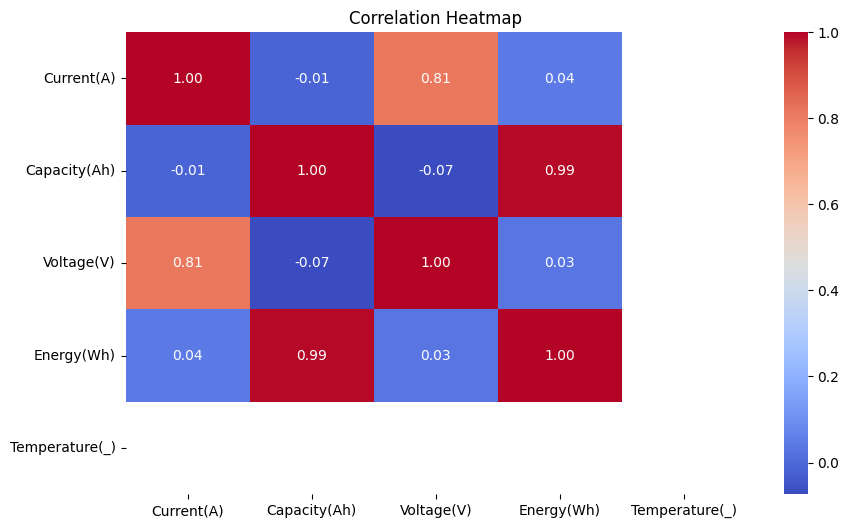

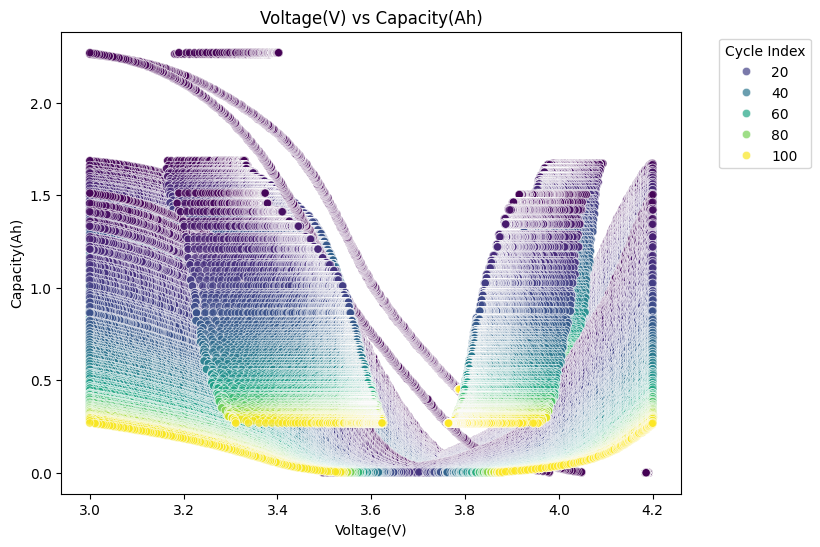

In [27]:
# Univariate Analysis
# Plot distributions of numeric columns
numeric_columns = ['Current(A)', 'Capacity(Ah)', 'Voltage(V)', 'Energy(Wh)', 'Temperature(_)']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Voltage(V) vs Capacity(Ah)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Voltage(V)', y='Capacity(Ah)', hue='Cycle_Index', palette='viridis', alpha=0.7)
plt.title('Voltage(V) vs Capacity(Ah)')
plt.xlabel('Voltage(V)')
plt.ylabel('Capacity(Ah)')
plt.legend(title='Cycle Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 4. Extract  charging phase,discharge phase related data. (Charge when current > 0 & vice versa)

In [ ]:
# Extracting charging and discharging phases
charging_data = df[df['Current(A)'] > 0]
discharging_data = df[df['Current(A)'] < 0]

# First few rows of each phase
print("Charging Data (First 5 Rows):")
print(charging_data.head())

print("\
Discharging Data (First 5 Rows):")
print(discharging_data.head())

# Saving the counts for each phase
print("\
    Number of Charging Data Points:", len(charging_data))
print("Number of Discharging Data Points:", len(discharging_data))


Charging Data (First 5 Rows):
      Data_Point Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  \
2258        2259      0:38:16       4.807         0.000      3.5352   
2259        2260      0:38:18       4.807         0.003      3.5352   
2260        2261      0:38:19       4.807         0.004      3.5476   
2261        2262      0:38:20       4.807         0.005      3.5572   
2262        2263      0:38:21       4.805         0.007      3.5612   

      Energy(Wh) Temperature(_)       Date_Time  Cycle_Index  C_rate  
2258       0.000              -  14/12/20 10:54            2  1.9228  
2259       0.010              -  14/12/20 10:54            2  1.9228  
2260       0.014              -  14/12/20 10:54            2  1.9228  
2261       0.019              -  14/12/20 10:54            2  1.9228  
2262       0.024              -  14/12/20 10:54            2  1.9220  
Discharging Data (First 5 Rows):
     Data_Point Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  \
298         29

In [29]:

charging_data.to_csv('charging_data.csv', index=False)
discharging_data.to_csv('discharging_data.csv', index=False)

print("Charging and discharging data have been saved as 'charging_data.csv' and 'discharging_data.csv'.")

Charging and discharging data have been saved as 'charging_data.csv' and 'discharging_data.csv'.


## 5. Calculate the charge_capacity,discharge capacity for every cycle . (Capacity(k+1) = Capacity(k) + Current(k+1) * (time(k+1) - time(k))/3600)

In [31]:
# calculating the capacity for charging and discharging phases using the formula

def calculate_capacity_and_save(data, filename):
    data = data.sort_values(by='Date_Time')  
    data['Time_Diff'] = data['Date_Time'].diff().dt.total_seconds() / 3600  
    data['Capacity'] = (data['Current(A)'] * data['Time_Diff']).cumsum() 
    data.to_csv(filename, index=False) 
    print("Data saved to " + filename)

# Calculating and saving the charging and discharging capacities
calculate_capacity_and_save(charging_data, 'charging_capacity.csv')
calculate_capacity_and_save(discharging_data, 'discharging_capacity.csv')

Data saved to charging_capacity.csv
Data saved to discharging_capacity.csv


In [32]:
# First few rows of each file to verify the calculations
print("Charging Capacity Data (First 5 rows):")
charging_cap = pd.read_csv('charging_capacity.csv')
print(charging_cap.head())

print("\
Discharging Capacity Data (First 5 rows):")
discharging_cap = pd.read_csv('discharging_capacity.csv')
print(discharging_cap.head())

Charging Capacity Data (First 5 rows):
   Data_Point Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  Energy(Wh)  \
0        2259      0:38:16       4.807         0.000      3.5352       0.000   
1        2285      0:38:43       4.807         0.036      3.6793       0.131   
2        2284      0:38:42       4.807         0.035      3.6747       0.125   
3        2283      0:38:41       4.807         0.033      3.6709       0.120   
4        2282      0:38:40       4.807         0.032      3.6663       0.115   

   Temperature(_)            Date_Time  Cycle_Index  Time_Diff  Capacity  
0             NaN  2020-12-14 10:54:00            2        NaN       NaN  
1             NaN  2020-12-14 10:54:00            2        0.0       0.0  
2             NaN  2020-12-14 10:54:00            2        0.0       0.0  
3             NaN  2020-12-14 10:54:00            2        0.0       0.0  
4             NaN  2020-12-14 10:54:00            2        0.0       0.0  
Discharging Capacity Data (Fir

## 6. Create a new variable c-rate. (see formula above)

## C-rate = Current(A) / Cell Capacity (Ah)

In [ ]:
# Cell capacity given in the problem
cell_capacity = 2.3

# Recalculating the C-rate using the given cell capacity
charging_data['C_rate'] = charging_data['Current(A)'] / cell_capacity
discharging_data['C_rate'] = abs(discharging_data['Current(A)']) / cell_capacity

# Saving the updated datasets
charging_data.to_csv('charging_data_with_crate_updated.csv', index=False)
discharging_data.to_csv('discharging_data_with_crate_updated.csv', index=False)

# Displaying the sample results
print("Updated Charging Data with C-rate (First 5 rows):")
print(charging_data[['Current(A)', 'Capacity(Ah)', 'C_rate']].head())
print("\
Updated Discharging Data with C-rate (First 5 rows):")
print(discharging_data[['Current(A)', 'Capacity(Ah)', 'C_rate']].head())


/var/folders/4n/h2_bm7w173b937_15jxdp9h80000gn/T/ipykernel_23549/1593069402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_data['C_rate'] = charging_data['Current(A)'] / cell_capacity
/var/folders/4n/h2_bm7w173b937_15jxdp9h80000gn/T/ipykernel_23549/1593069402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharging_data['C_rate'] = abs(discharging_data['Current(A)']) / cell_capacity


Updated Charging Data with C-rate (First 5 rows):
      Current(A)  Capacity(Ah)   C_rate
2258       4.807         0.000  2.09000
2259       4.807         0.003  2.09000
2260       4.807         0.004  2.09000
2261       4.807         0.005  2.09000
2262       4.805         0.007  2.08913
Updated Discharging Data with C-rate (First 5 rows):
     Current(A)  Capacity(Ah)   C_rate
298      -4.805         0.000  2.08913
299      -4.805         0.003  2.08913
300      -4.805         0.004  2.08913
301      -4.807         0.005  2.09000
302      -4.807         0.007  2.09000


## 7. Perform visualizations (Charge capacity vs Voltage , Charge capacity vs Cycle count etc. vice versa with discharge)

In [40]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')


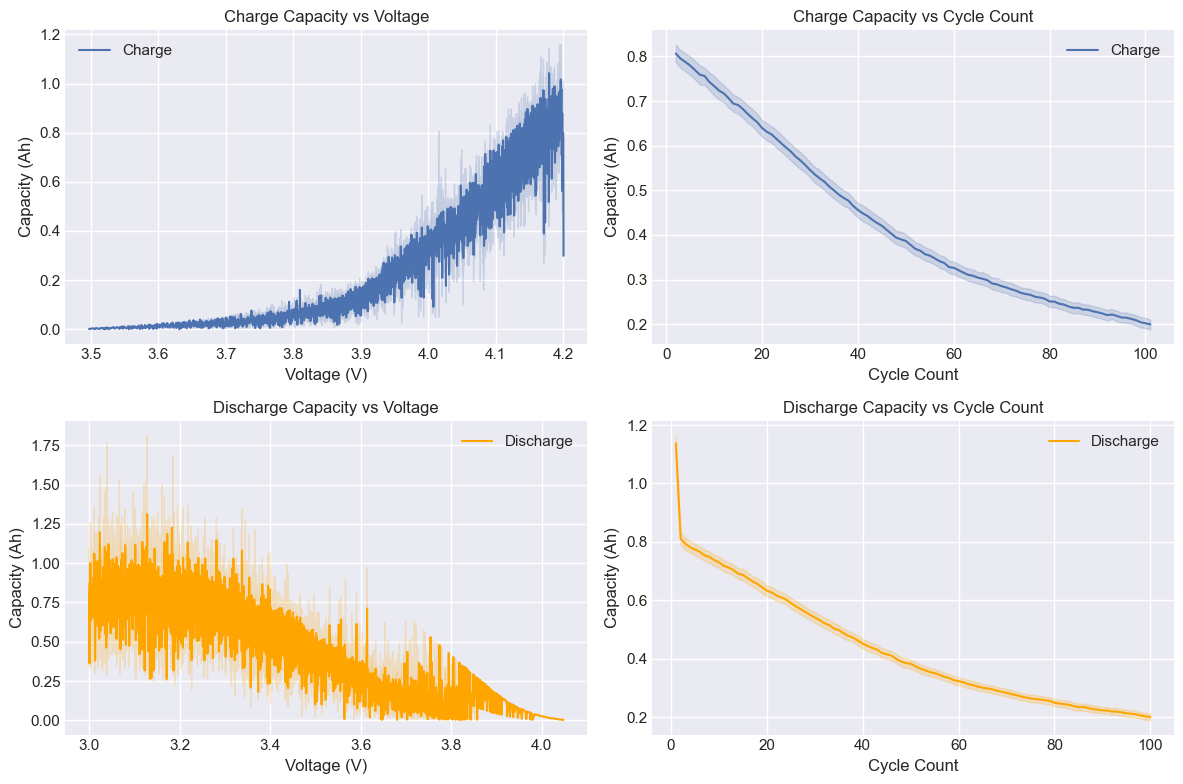

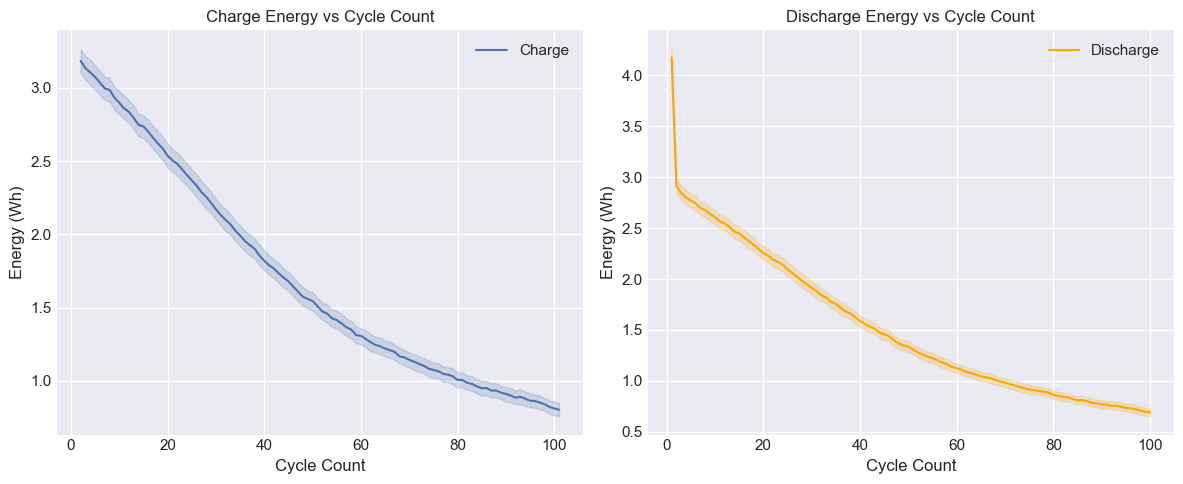

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 8))

# Charge capacity vs Voltage
plt.subplot(2, 2, 1)
sns.lineplot(data=charging_data, x='Voltage(V)', y='Capacity(Ah)', label='Charge')
plt.title('Charge Capacity vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Capacity (Ah)')

# Charge capacity vs Cycle count
plt.subplot(2, 2, 2)
sns.lineplot(data=charging_data, x='Cycle_Index', y='Capacity(Ah)', label='Charge')
plt.title('Charge Capacity vs Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('Capacity (Ah)')

# Discharge capacity vs Voltage
plt.subplot(2, 2, 3)
sns.lineplot(data=discharging_data, x='Voltage(V)', y='Capacity(Ah)', label='Discharge', color='orange')
plt.title('Discharge Capacity vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Capacity (Ah)')

# Discharge capacity vs Cycle count
plt.subplot(2, 2, 4)
sns.lineplot(data=discharging_data, x='Cycle_Index', y='Capacity(Ah)', label='Discharge', color='orange')
plt.title('Discharge Capacity vs Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('Capacity (Ah)')

# layouts and showing plots
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 5))

# Charge Energy vs Cycle count
plt.subplot(1, 2, 1)
sns.lineplot(data=charging_data, x='Cycle_Index', y='Energy(Wh)', label='Charge')
plt.title('Charge Energy vs Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('Energy (Wh)')

# Discharge Energy vs Cycle count
plt.subplot(1, 2, 2)
sns.lineplot(data=discharging_data, x='Cycle_Index', y='Energy(Wh)', label='Discharge', color='orange')
plt.title('Discharge Energy vs Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('Energy (Wh)')

plt.tight_layout()
plt.show()

## 8. Explain the influence of c-rate on the charge_capacity and what differences did you observe in charging and discharging phase capacity over cycles.


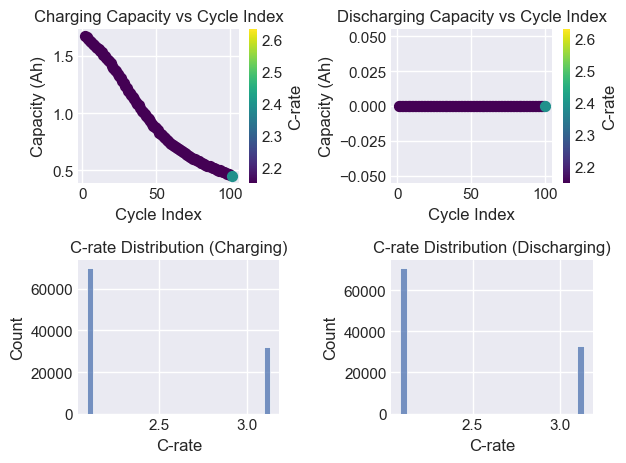

Charging C-rate Statistics:
               C_rate           Capacity(Ah)
                 mean       std          max
Cycle_Index                                 
2            2.482890  0.504206        1.672
3            2.477534  0.502670        1.666
4            2.469778  0.500816        1.647
5            2.470471  0.501124        1.633
6            2.467275  0.500252        1.625
Discharging C-rate Statistics:
               C_rate           Capacity(Ah)
                 mean       std          min
Cycle_Index                                 
1            2.509713  0.510149          0.0
2            2.479966  0.503360          0.0
3            2.473754  0.501794          0.0
4            2.470735  0.500977          0.0
5            2.473319  0.501956          0.0


In [46]:
# Plot 1: Capacity vs Cycle Index for different C-rates (Charging)
plt.subplot(2, 2, 1)
for cycle in charging_data['Cycle_Index'].unique():
    cycle_data = charging_data[charging_data['Cycle_Index'] == cycle]
    max_capacity = cycle_data['Capacity(Ah)'].max()
    c_rate = cycle_data['C_rate'].mean()
    plt.scatter(cycle, max_capacity, c=c_rate, cmap='viridis', s=50)

plt.colorbar(label='C-rate')
plt.title('Charging Capacity vs Cycle Index')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity (Ah)')

# Plot 2: Capacity vs Cycle Index for different C-rates (Discharging)
plt.subplot(2, 2, 2)
for cycle in discharging_data['Cycle_Index'].unique():
    cycle_data = discharging_data[discharging_data['Cycle_Index'] == cycle]
    max_capacity = abs(cycle_data['Capacity(Ah)'].min())  # Use abs for discharge
    c_rate = cycle_data['C_rate'].mean()
    plt.scatter(cycle, max_capacity, c=c_rate, cmap='viridis', s=50)

plt.colorbar(label='C-rate')
plt.title('Discharging Capacity vs Cycle Index')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity (Ah)')

# Plot 3: C-rate distribution during charging
plt.subplot(2, 2, 3)
sns.histplot(data=charging_data, x='C_rate', bins=30)
plt.title('C-rate Distribution (Charging)')
plt.xlabel('C-rate')
plt.ylabel('Count')

# Plot 4: C-rate distribution during discharging
plt.subplot(2, 2, 4)
sns.histplot(data=discharging_data, x='C_rate', bins=30)
plt.title('C-rate Distribution (Discharging)')
plt.xlabel('C-rate')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Statistical summary
print("\
Charging C-rate Statistics:")
print(charging_data.groupby('Cycle_Index').agg({
    'C_rate': ['mean', 'std'],
    'Capacity(Ah)': 'max'
}).head())

print("\
Discharging C-rate Statistics:")
print(discharging_data.groupby('Cycle_Index').agg({
    'C_rate': ['mean', 'std'],
    'Capacity(Ah)': 'min'
}).head())

## 9. Use ML methods like poly. regression to extrapolate the total Charge capacity w.r.t cycle count.for every c-rate.

/var/folders/4n/h2_bm7w173b937_15jxdp9h80000gn/T/ipykernel_23549/1220673874.py:45: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y - y_pred) / y)) * 100


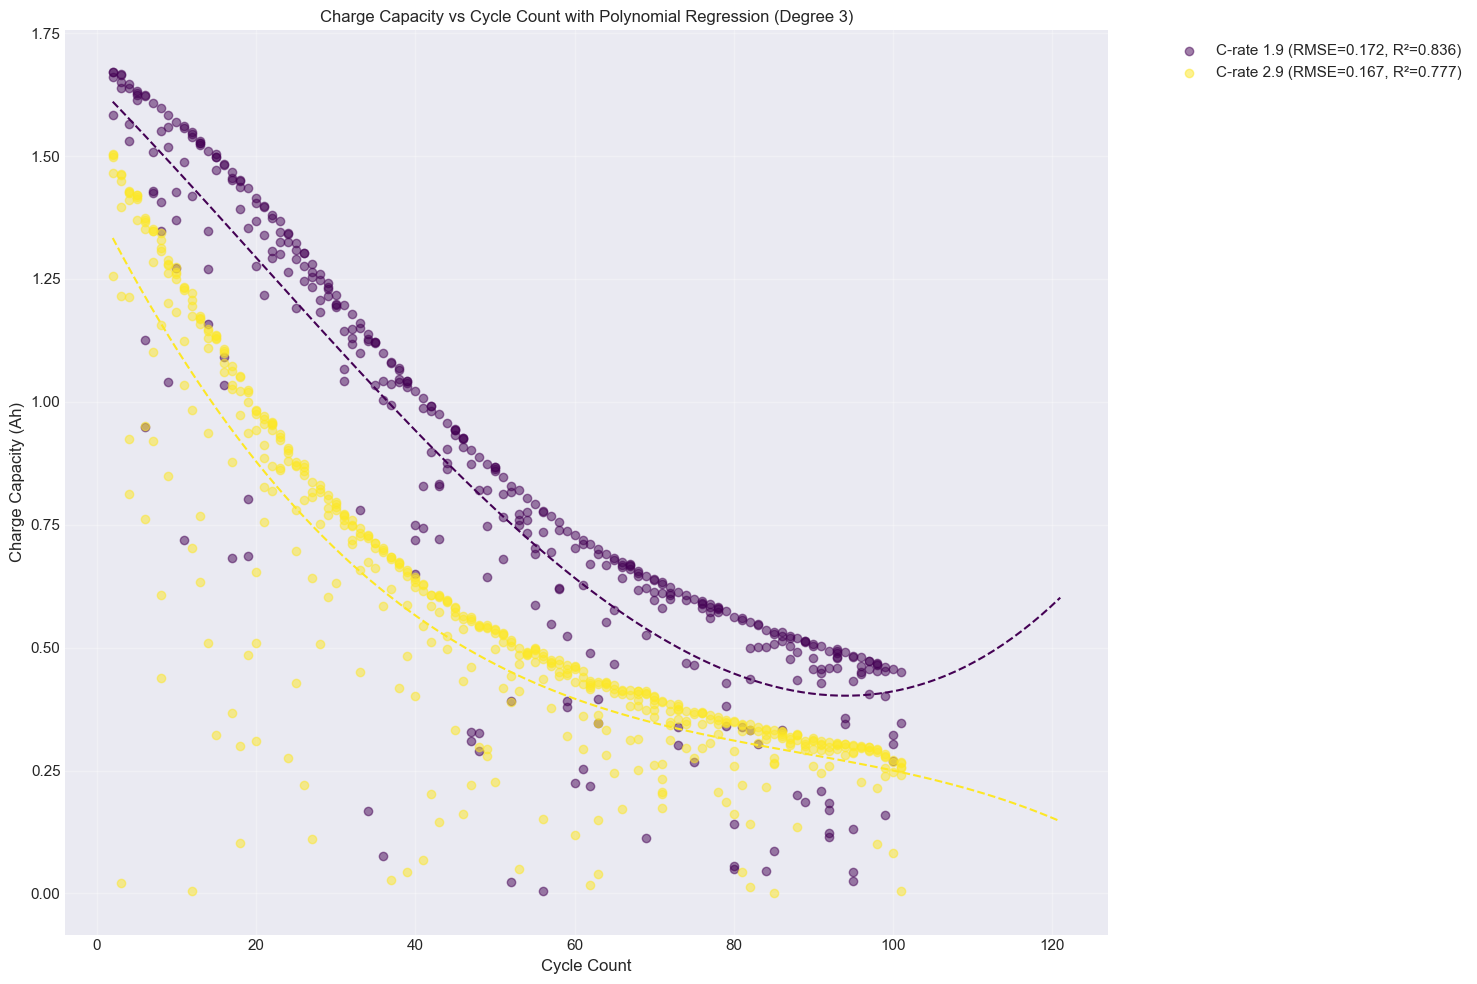

Detailed Performance Metrics:
C-rate 1.9:
RMSE: 0.1724 Ah
MAE: 0.1189 Ah
MAPE: 80.51%
R² Score: 0.8360
Polynomial Coefficients:
  x^1: -0.016607
  x^2: -0.000068
  x^3: 0.000001
Intercept: 1.644088
C-rate 2.9:
RMSE: 0.1670 Ah
MAE: 0.1031 Ah
MAPE: inf%
R² Score: 0.7769
Polynomial Coefficients:
  x^1: -0.031943
  x^2: 0.000329
  x^3: -0.000001
Intercept: 1.395854


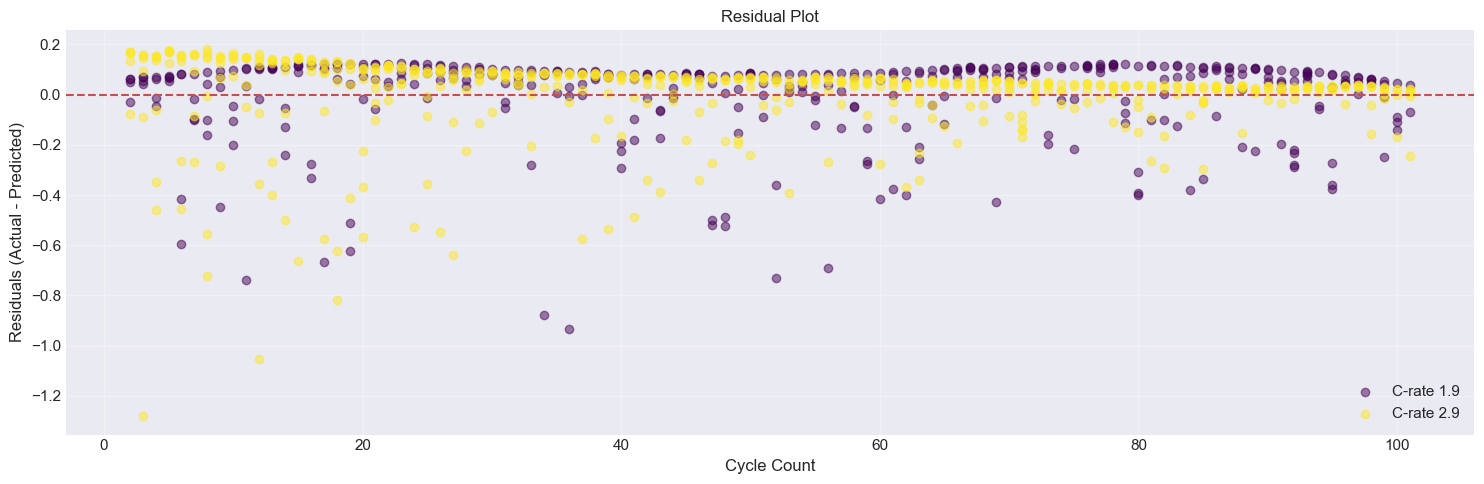

Residual Analysis:
C-rate 1.9:
Mean of residuals: -0.000000
Standard deviation of residuals: 0.172438
Residual range: [-0.933724, 0.127398]
C-rate 2.9:
Mean of residuals: 0.000000
Standard deviation of residuals: 0.166996
Residual range: [-1.280958, 0.183239]


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


df = pd.read_csv('merged_data.csv')
nominal_capacity = 2.5  # Ah
df['C_rate'] = abs(df['Current(A)'] / nominal_capacity)

# Filteing the charging data and getting the maximum capacity per cycle
charging_data = df[df['Current(A)'] > 0]
cycle_capacity = charging_data.groupby(['Cycle_Index', 'C_rate'])['Capacity(Ah)'].max().reset_index()
cycle_capacity['C_rate_rounded'] = cycle_capacity['C_rate'].round(1)

# figure
plt.figure(figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(cycle_capacity['C_rate_rounded'].unique())))

# Storing the metrics
metrics = {}

# Performming polynomial regression for each C-rate group
for (c_rate, group), color in zip(cycle_capacity.groupby('C_rate_rounded'), colors):
   
    X = group['Cycle_Index'].values.reshape(-1, 1)
    y = group['Capacity(Ah)'].values
    
    # Creating and fitting the polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # predictions
    y_pred = model.predict(X_poly)
    
    # metrics
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    metrics[c_rate] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }
    
    # Generating points for smooth curve
    X_smooth = np.linspace(X.min(), X.max() + 20, 100).reshape(-1, 1)
    X_smooth_poly = poly.transform(X_smooth)
    y_pred_smooth = model.predict(X_smooth_poly)
    
    # Plotting original data and regression data
    plt.scatter(X, y, alpha=0.5, color=color, 
               label=f'C-rate {c_rate:.1f} (RMSE={rmse:.3f}, R²={r2:.3f})')
    plt.plot(X_smooth, y_pred_smooth, color=color, linestyle='--')

plt.title('Charge Capacity vs Cycle Count with Polynomial Regression (Degree 3)')
plt.xlabel('Cycle Count')
plt.ylabel('Charge Capacity (Ah)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Metrics Value
print("\
Detailed Performance Metrics:")
for c_rate, metric in metrics.items():
    print(f"\
C-rate {c_rate:.1f}:")
    print(f"RMSE: {metric['RMSE']:.4f} Ah")
    print(f"MAE: {metric['MAE']:.4f} Ah")
    print(f"MAPE: {metric['MAPE']:.2f}%")
    print(f"R² Score: {metric['R2']:.4f}")
    print("Polynomial Coefficients:")
    for i, coef in enumerate(metric['Coefficients'][1:]):  # Skip the intercept term
        print(f"  x^{i+1}: {coef:.6f}")
    print(f"Intercept: {metric['Intercept']:.6f}")

# Calculating and plotting the residuals
plt.figure(figsize=(15, 5))
for (c_rate, group), color in zip(cycle_capacity.groupby('C_rate_rounded'), colors):
    X = group['Cycle_Index'].values.reshape(-1, 1)
    y = group['Capacity(Ah)'].values
    
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    y_pred = metrics[c_rate]['Coefficients'].dot(X_poly.T) + metrics[c_rate]['Intercept']
    
    residuals = y - y_pred
    plt.scatter(X, residuals, alpha=0.5, color=color, label=f'C-rate {c_rate:.1f}')

plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Cycle Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# statistical analysis
print("\
Residual Analysis:")
for c_rate, group in cycle_capacity.groupby('C_rate_rounded'):
    X = group['Cycle_Index'].values.reshape(-1, 1)
    y = group['Capacity(Ah)'].values
    
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    y_pred = metrics[c_rate]['Coefficients'].dot(X_poly.T) + metrics[c_rate]['Intercept']
    
    residuals = y - y_pred
    
    print(f"\
C-rate {c_rate:.1f}:")
    print(f"Mean of residuals: {np.mean(residuals):.6f}")
    print(f"Standard deviation of residuals: {np.std(residuals):.6f}")
    print(f"Residual range: [{np.min(residuals):.6f}, {np.max(residuals):.6f}]")

## 10. Calculate State of Health (SoH) from the charge capacity of each cycle and try to visualize the degradation behaviour.

## i)For Cycle 4


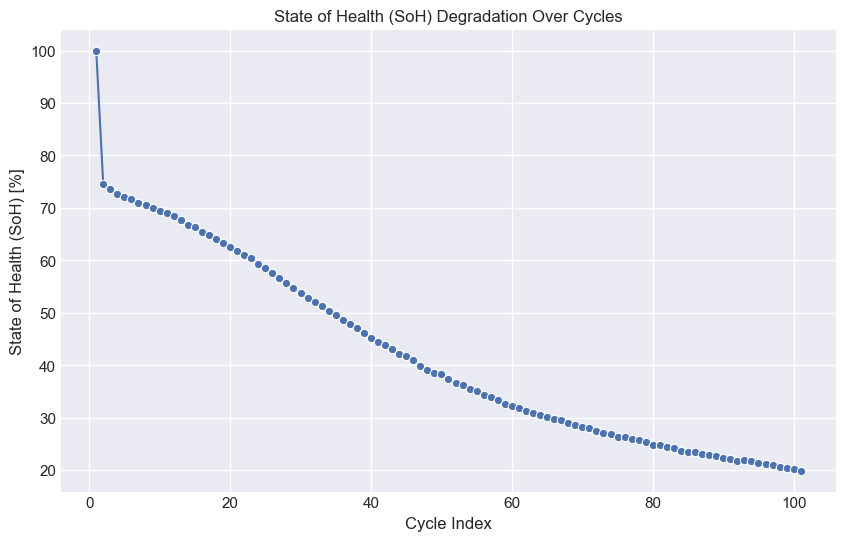

   Cycle_Index  Capacity(Ah)         SoH
0            1         2.264  100.000000
1            2         1.687   74.514134
2            3         1.666   73.586572
3            4         1.647   72.747350
4            5         1.633   72.128975


In [ ]:
data4 = pd.read_csv('LR1865SZ_cycles201214_002_4.csv')
data4['Capacity(Ah)'] = pd.to_numeric(data4['Capacity(Ah)'], errors='coerce')
data4['Cycle_Index'] = pd.to_numeric(data4['Cycle_Index'], errors='coerce')

# Group by Cycle_Index to calculate the maximum capacity for each cycle
cycle_capacity = data4.groupby('Cycle_Index')['Capacity(Ah)'].max().reset_index()

# Calculating the State of Health (SoH) as a percentage of the maximum capacity
max_capacity = cycle_capacity['Capacity(Ah)'].max()
cycle_capacity['SoH'] = (cycle_capacity['Capacity(Ah)'] / max_capacity) * 100

# Plotting the SoH degradation over cycles
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cycle_Index', y='SoH', data=cycle_capacity, marker='o')
plt.title('State of Health (SoH) Degradation Over Cycles')
plt.xlabel('Cycle Index')
plt.ylabel('State of Health (SoH) [%]')
plt.grid(True)
plt.show()

# Displaying the first few rows of the calculated SoH data
print(cycle_capacity.head())

In [54]:
output_filename = 'battery_soh_data_cycle4.csv'
cycle_capacity.to_csv(output_filename, index=False)
print(f"Data saved to {output_filename}")


Data saved to battery_soh_data_cycle4.csv


## ii) CYCLE 2

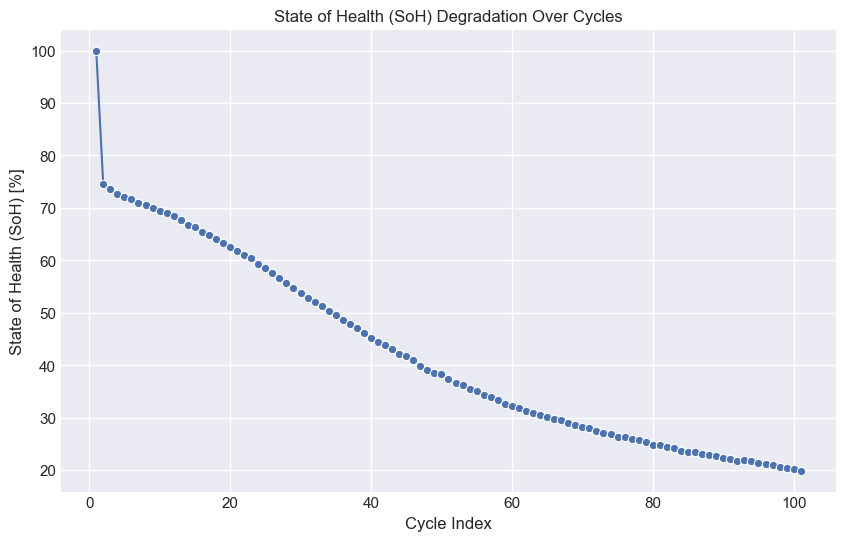

   Cycle_Index  Capacity(Ah)         SoH
0            1         2.264  100.000000
1            2         1.687   74.514134
2            3         1.666   73.586572
3            4         1.647   72.747350
4            5         1.633   72.128975


In [57]:

data5 = pd.read_csv('LR1865SZ_cycles201214_002_4.csv')

data5['Capacity(Ah)'] = pd.to_numeric(data5['Capacity(Ah)'], errors='coerce')
data5['Cycle_Index'] = pd.to_numeric(data5['Cycle_Index'], errors='coerce')

# Group by Cycle_Index to calculate the maximum capacity for each cycle
cycle_capacity = data5.groupby('Cycle_Index')['Capacity(Ah)'].max().reset_index()

# Calculating the State of Health (SoH) as a percentage of the maximum capacity
max_capacity = cycle_capacity['Capacity(Ah)'].max()
cycle_capacity['SoH'] = (cycle_capacity['Capacity(Ah)'] / max_capacity) * 100

# Plotting the SoH degradation over cycles
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cycle_Index', y='SoH', data=cycle_capacity, marker='o')
plt.title('State of Health (SoH) Degradation Over Cycles')
plt.xlabel('Cycle Index')
plt.ylabel('State of Health (SoH) [%]')
plt.grid(True)
plt.show()

print(cycle_capacity.head())

In [56]:
output_filename = 'battery_soh_data_cycle2.csv'
cycle_capacity.to_csv(output_filename, index=False)
print(f"Data saved to {output_filename}")

Data saved to battery_soh_data_cycle2.csv


## 12. Write your thought process behind every step you followed briefly.

     
## 1. Import the 2 datasets and join them as one file.
 * I imported the data using the pandas dataset and tried to visualize them using the head function whether it is imported correctly or not then i used the concatenation command to merge the data and then i saved it as a csv file too.

## 2 Analyse each variable such as voltage, time, current, capacity, energy, cycle_Index

* I have defined a function which can print the statistical analysis of each variable and will be able to give the parameters such as mean , standard deviation,min max values and then i plotted a histogram to show the probability distribution of the variable.
using seaborn package

## 3. Perform the exploratory data analysis (EDA : Univariate, Bivariate etc) and clean the data.

Here initially to find the missing values i have used the function 
  * isnull().sum() - which can count all the missing values in the column
  * then i have converted the date_time in datetime format='%d/%m/%y %H:%M' which will be easier for data analysis
  * then i Converted the Temperature(_) column to numeric and replaced non numeric values with NAN
  * then i dropped the rows where Date_Time is missing because it is more critical for time-based analysis

Univariate analysis
  *  I plotted a histogram to show the probability distribution of the variable using seaborn package

Bivariate analysis
*  df.corr() calculate the correlation matrix to show the correlation between 2 variables
*  I plotted a heatmap which visualizes the correlation matrix with different color density

## 4.Extract  charging phase,discharge phase related data. (Charge when current > 0 & vice versa)

* Here basically if the current is positive that means the battery is being charged Current > 0 so i seperated those 
* If the current is negative that means the current is being discharged Current < 0 so i separated those as well
* I found the length of charging and discharging datasets too
* then i saved it as a csv file 

## 5. Calculate the charge_capacity,discharge capacity for every cycle . (Capacity(k+1) = Capacity(k) + Current(k+1) * (time(k+1) - time(k))/3600)

* Here i have defined a function to calculate the capacity using the functions below 
  * time_diff - calculate the time difference between 2 consecutive rows in hours
     * diff( )- it calculates the difference between consecutive rows in the Date_Time column
     * dt.total_seconds(): Converts the time difference into seconds.
     * Division by 3600 converts seconds into hours.
  * Capacity - multiply the current with the time difference to get the incremental capacity
  * cumsum() is used to compute the cumulative sum of the incremental capacities.

## 6. Create a new variable c-rate.

C-rate = Current(A) / Cell Capacity (Ah)

* C- rate is calculated by using the formula given in the task 
* cell_capacity = 2.3 Ampere-hour (given)
* in discharging data alone i used absolute function to make sure the C-rate is positive because while discharging the current goes negative

## 7. Perform visualizations (Charge capacity vs Voltage , Charge capacity vs Cycle count etc. vice versa with discharge)

* for a clean plotting i used the seaborn-darkgrid as the plotting style 
* All the plots in this section are done with the help of seaborn 

Relationships:
* Capacity vs Voltage to understand operational limits.
* Capacity and Energy vs Cycle Count to observe degradation trends.

## 8. Explain the influence of c-rate on the charge_capacity and what differences did you observe in charging and discharging phase capacity over cycles.


C-rate on charge capacity:
 * Charging Phase: Higher C-rates reduce charge capacity due to polarization and faster aging. Over cycles, capacity degradation is steeper at higher C-rates.
 * Discharging Phase: Discharge capacity decreases with higher C-rates due to voltage drops. Over time, degradation is more pronounced at higher C-rates.

Observations on Cycles:
 * Charging: Maximum capacity declines over cycles, with higher C-rates showing faster degradation
 * Discharging: Capacity consistently drops, with higher C-rates causing a steeper decline.

* Capacity vs. Cycle Index: Scatter plots show capacity trends with C-rate influence. Higher C-rates cluster at lower capacities.
* C-rate Distributions: Histograms highlight the range and frequency of C-rates during charging and discharging.

## 9. Use ML methods like poly. regression to extrapolate the total Charge capacity w.r.t cycle count.for every c-rate.

Here i have used scikit-learn library for machine learning and matplotlib for plotting.

Polynomial Regression:
* X: Cycle count (independent variable)
* y: Charge capacity (dependent variable)
* degree: 3 (converts x into polynomial features of degree 3)

Metrice:
* RMSE , MAE , MAPE,R^2 has been used to evaluate the model.

* Scattered plots are used for plotting between original data and regression data

Residuals:
* Residuals are calculated by subtracting the predicted values from the actual values
* Scatter plot of residuals to evaluate the model fit (residuals should be centered around zero).


## 10. Calculate State of Health (SoH) from the charge capacity of each cycle and try to visualize the degradation behaviour.

Max Capacity:
* max_capacity = cycle_capacity['Capacity(Ah)'].max() is used to find the highest capacity recorded across all cycles

SOH:
* soh = (capacity) / (max_capacity) * 100 is used to calculate the SOH percentage

Visualisation of SOH degradation:
* X-axis: Cycle_Index (number of charge/discharge cycles).
* Y-axis: SoH (battery health in percentage)

* the line plot with sns.lineplot shows the SoH decline over time
